## Medial axis のアルゴリズムイメージ
<img src="http://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/bitanmed.gif">

In [1]:
# Document
# http://scikit-image.org/docs/dev/api/skimage.morphology.html?highlight=medial_axis#skimage.morphology.medial_axis

# Sample code
# http://scikit-image.org/docs/0.10.x/auto_examples/plot_medial_transform.html

%matplotlib inline
import numpy as np
from scipy import ndimage
from skimage.morphology import medial_axis
from skimage.filters import gaussian
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

In [3]:
# ランダムな２値画像生成
def microstructure(l=256, rs=1):
    """
    Synthetic binary data: binary microstructure with blobs.

    Parameters
    ----------

    l: int, optional
        linear size of the returned image

    """
    n = 5
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l/2)**2 + (y - l/2)**2 < (l/2)**2
    mask = np.zeros((l, l))
    generator = np.random.RandomState(rs)
    points = l * generator.rand(2, n**2)
    mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l/(4.*n))
    return mask > mask.mean()

data = microstructure(l=128, rs=5)

In [4]:
# 画像読み込み
im = Image.open('./stroke.png')
gray_im = im.convert('L')
arr = np.asarray(gray_im)
#arr = arr.reshape((128*128))
arr.flags.writeable = True
arr[arr!=255]=True
arr[arr==255]=False

data = arr.astype(bool)

In [5]:
def plot_medial_axis(skel, distance, show_distance=True):
    # Distance to the background for pixels of the skeleton
    if(show_distance):
        dist_on_skel = distance * skel
    else:
        dist_on_skel = skel

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
    ax1.axis('off')
    ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
    ax2.contour(data, [0.5], colors='w')
    ax2.axis('off')

    fig.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)
    plt.show()

In [6]:
# Compute the medial axis (skeleton) and the distance transform
# distance transform: 輪郭からの距離が長くなると濃くなる
skel, distance = medial_axis(data, return_distance=True)

- ストロークの先端が細い場合はMedial axisが端までいく
- 四角だと分岐する

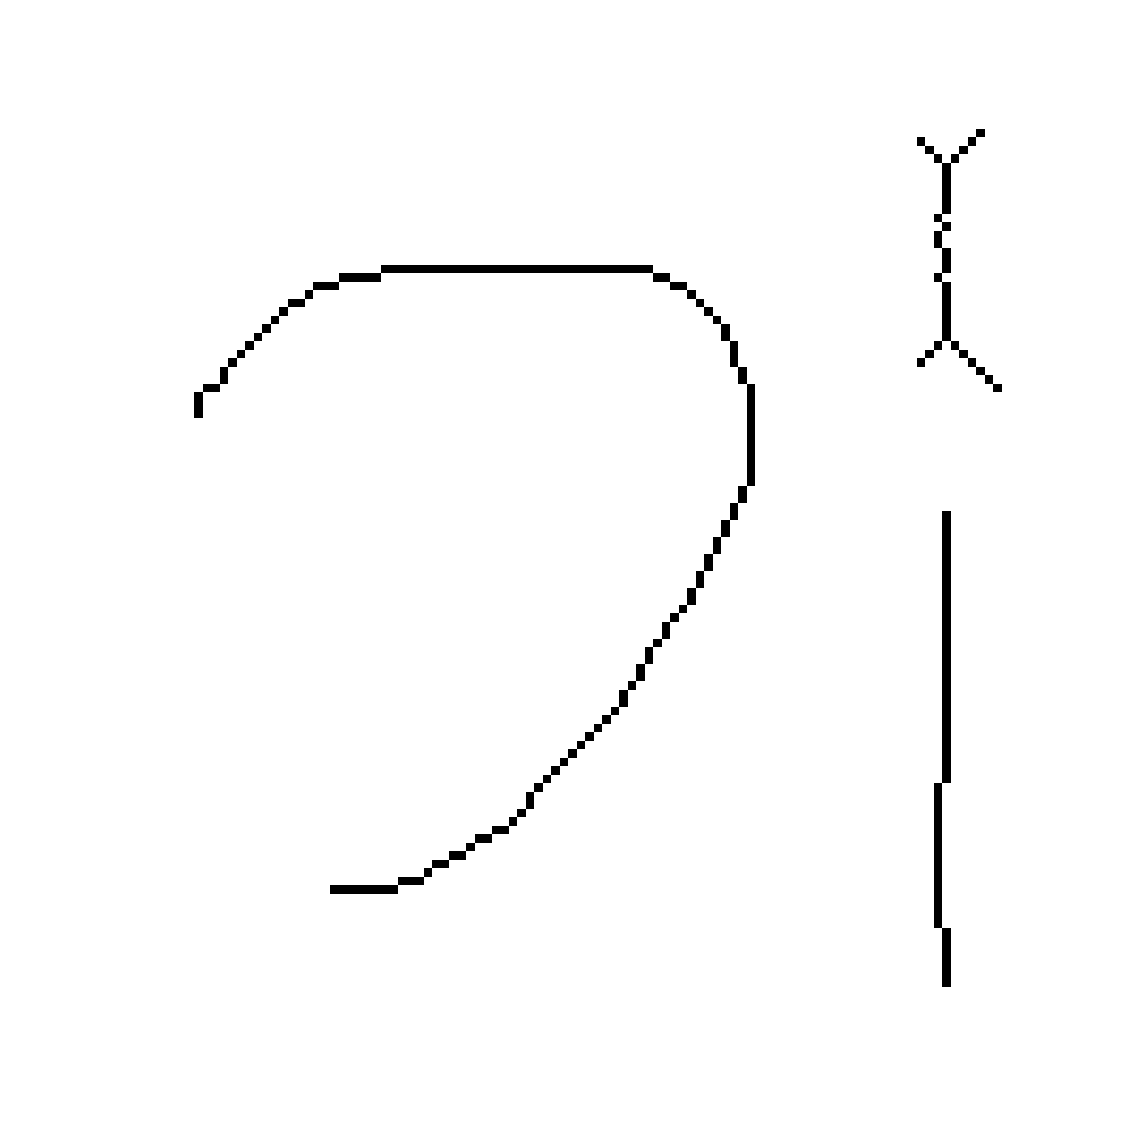

In [7]:
plt.figure(figsize = (20,20))
plt.imshow(skel , cmap='Greys',  interpolation='nearest')
plt.axis('off')
plt.show()

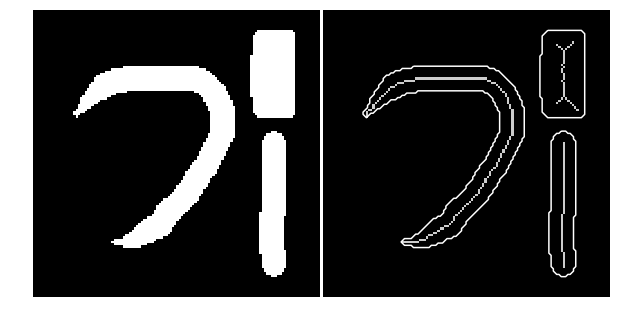

In [8]:
plot_medial_axis(skel, distance, show_distance=False)

In [9]:
# Medial axis を座標に変換
np.argwhere(skel)

array([[ 14, 111],
       [ 15, 104],
       [ 15, 110],
       [ 16, 105],
       [ 16, 109],
       [ 17, 106],
       [ 17, 108],
       [ 18, 107],
       [ 19, 107],
       [ 20, 107],
       [ 21, 107],
       [ 22, 107],
       [ 23, 107],
       [ 24, 106],
       [ 25, 107],
       [ 26, 106],
       [ 27, 106],
       [ 28, 107],
       [ 29, 107],
       [ 30,  41],
       [ 30,  42],
       [ 30,  43],
       [ 30,  44],
       [ 30,  45],
       [ 30,  46],
       [ 30,  47],
       [ 30,  48],
       [ 30,  49],
       [ 30,  50],
       [ 30,  51],
       [ 30,  52],
       [ 30,  53],
       [ 30,  54],
       [ 30,  55],
       [ 30,  56],
       [ 30,  57],
       [ 30,  58],
       [ 30,  59],
       [ 30,  60],
       [ 30,  61],
       [ 30,  62],
       [ 30,  63],
       [ 30,  64],
       [ 30,  65],
       [ 30,  66],
       [ 30,  67],
       [ 30,  68],
       [ 30,  69],
       [ 30,  70],
       [ 30,  71],
       [ 30,  72],
       [ 30, 107],
       [ 31,